In [1]:
import locale

import numpy as np
import scipy.stats as sps
from scipy.integrate import quad
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Задача 5.1
=========

Построим график плотности случайного вектора. $\xi = (\xi_1, \xi_2) \sim N(a, \Sigma)$,
где $a = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
и $\Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix}$


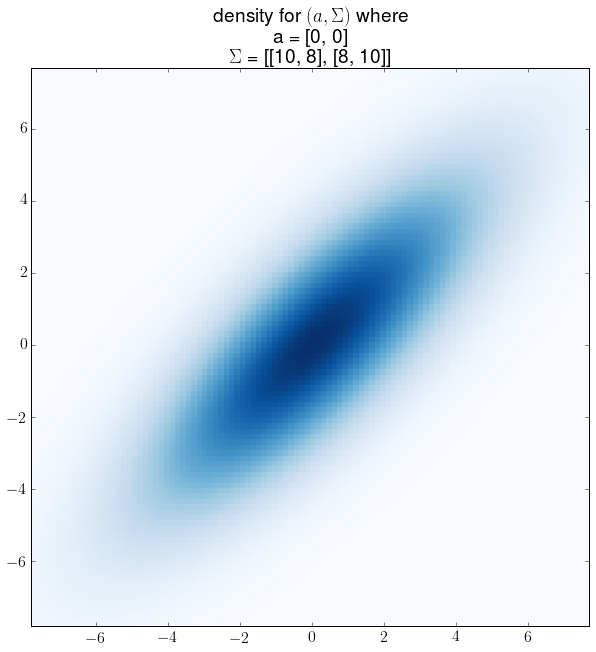

In [76]:
def draw_density(a, sigma, figsz=10):
    
    # План простой.
    # 1. Определить сетку, на которой считаем значения.
    # 2. Получить распределение.
    # 3. Настроить график, чтобы было красиво.
    # 4. Вызвать отрисовку графика по созданной сетке.
    
    # Понятны все этапы, кроме создания сетки, потому что
    # в создании сетки используются неочевидные встроенные функции.
    # Их я поясню. В основном, чтобы самой не забыть.
    
    # Краткий экскурс: какой результат возвращает 
    #     mgrid[start1:end1:step1, start2:end2:step2]?
    # Обозначим как v1 вектор значений от start1 (включая) до end1 (не включая), с шагом step1
    # Обозначим как v2 вектор значений от start2 (включая) до end2 (не включая), с шагом step2
    # mgrid генерирует 2 массива размерности (len(v1), len(v2)) каждый
    # у первого массива столбцы равны вектору v1
    # у второго массива строки равны вектору v2
    
    # Краткий экскурс: np.empty и shape
    #   Размерность массива выражается кортежем (x1, x2, ..., xn),
    #   в котором x1 — это самая «наружняя» размерность, а xn — самая внутренняя.
    #   np.empty создаёт массив нужного размера, заполненный мусором (а не нулями).
    #   Из-за отсутствия обнуления он может работать быстрее, но несколько смущать.
    
    # Краткий экскурс: ndarray slicing
    #     У ndarray можно брать срезы по любому измерению.
    #     Двоеточие забирает все элементы по соответствующей размерности.
    # Пример:
    # >>> x = np.array([[1, 2], [3, 4], [5, 6]])
    # >>> y = x[:, 1]
    # >>> print(y)
    # [2 4 6]
    
    # 1.
    
    # xx — все координаты по x,
    # yy — все координаты по y.
    xx, yy = np.mgrid[-8:8:0.15, -8:8:0.15]
    
    # grid — пары координат [x, y], поэтому добавляем размерность
    grid = np.empty(xx.shape + (2,))
    
    # заполняем значения координат по x и y
    grid[:, :, 0] = xx
    grid[:, :, 1] = yy
    
    # 2.
    distr = sps.multivariate_normal(a, sigma)
    
    # 3.
    plt.rc('text', usetex=True)
    plt.rc('font', size=16)
    plt.figure(figsize=(figsz, figsz))
    plt.axes().set_aspect('equal')
    plt.xlim((np.min(xx) + 0.2, np.max(xx) - 0.2))
    plt.ylim((np.min(yy) + 0.2, np.max(yy) - 0.2))
    plt.title(r'density for $(a, \Sigma)$ where ' +
              '\na = ' + str(a) + '\n' + r'$\Sigma$ = ' + str(sigma))

    # 4.
    plt.pcolormesh(xx, yy, distr.pdf(grid), cmap="Blues")
    plt.show()
    
draw_density([0,0], [[10, 8], [8, 10]])

Просто по графику совместной плотности сложно сделать какой-либо вывод. Поэтому посмотрим ещё и на то, как выглядят графики плотности для нормального случайного вектора с другими параметрами и сделаем вывод о том, как параметры влияют на график.

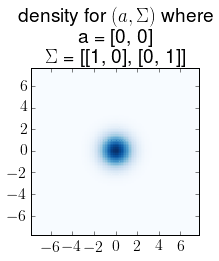

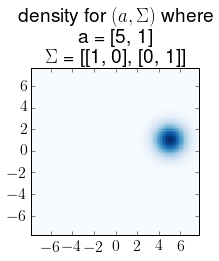

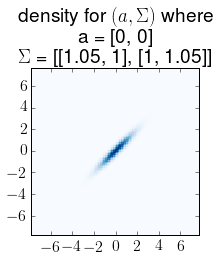

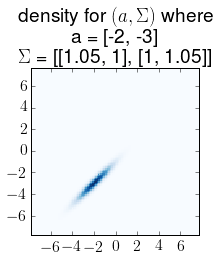

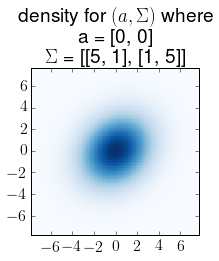

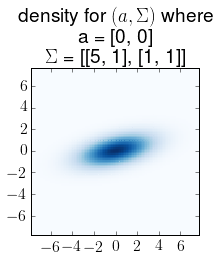

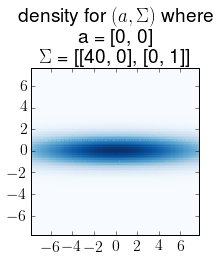

In [85]:
draw_density([0,0], [[1, 0], [0, 1]], 3)
draw_density([5,1], [[1, 0], [0, 1]], 3)
draw_density([0,0], [[1.05, 1], [1, 1.05]], 3)
draw_density([-2,-3], [[1.05, 1], [1, 1.05]], 3)
draw_density([0,0], [[5, 1], [1, 5]], 3)
draw_density([0,0], [[5, 1], [1, 1]], 3)
draw_density([0,0], [[40, 0], [0, 1]], 3)


Вектор математических ожиданий определяет сдвиг фигуры. Чем больше дисперсия компоненты вектора, тем шире тёмная часть фигуры по соответветствующей координате. Чем больше ковариация, тем заметнее вытянутость вдоль линии y = x. Можно сделать вывод о том, что параметры распределения достаточно наглядно воздействуют на график плотности (в частности, это можно наблюдать и на графике для вектора из условия) и их воздействия хорошо соотносятся с тем, за что, как мы считаем, они отвечают: математическое ожидание — за «среднюю точку», дисперсия — за разброс, ковариация — за коррелированность.

Ищем условную плотность. Обозначим совместную плотность через $f_{(\xi_1, \xi_2)}(x, y)$, а маргинальную плотность — через $f_{\xi_2}(y)$.
$$f_{\xi_2}(y) = \int_{-\inf}^{inf}f_{(\xi_1, \xi_2)}(x, y)dx$$

$$f_{\xi_1 | \xi_2}(x | y) = \frac{f_{(\xi_1, \xi_2)}(x, y)}{f_{\xi_2}(y)} \mathbb{~~при~~} f_{\xi_2}(y) > 0,$$ 
$$f_{\xi_1 | \xi_2}(x | y) = 0 \mathbb{~~при~~} f_{\xi_2}(y) = 0.$$ 

In [ ]:
a=[0, 0]
sigma=[[10, 8], [8, 10]]
distr = sps.multivariate_normal(a, sigma)

def marginal_density(y):
    return quad(lambda x: distr.pdf([x, y]), -np.inf, np.inf)

def conditional_density(x, y):
    if marginal_density(y) == 0:
        return 0;
    return distr.pdf([x, y]) / marginal_density(y)

@np.vectorize
def conditional_estimate(y):
    return quad(lambda x: x * conditional_density(x, y), -np.inf, np.inf)

def get_conditional_density_for(y):
    return np.vectorize(lambda x: conditional_density(x, y))